In [1]:
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve   


In [2]:
data = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
data 


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


identify duplicate entry 
Duplicate entries given wrong pridiction and also consume unnecessory storage and consuming time during testing and training data

Not found any duplicated entries inside the data

In [3]:

# Data sets discription 
# _Diagnosing the data 
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps
    
# Custom Function
datainfo()


,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


There are 14 features with 8760 rows of data.
There are 4 categorical columns and 10 numerical columns. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type
Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type
Columns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type
Not any null value present in any column
Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2

In [4]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Count the number of null values in each column
null_values = data.isnull().sum().sum()
# Print the total number of null values
print(f"There are {null_values} null values in the dataset.")
# Statistical info.
data.describe().T                             

Duplicate entry in data: 0
Total Rows and Columns in DataFrame is : (8760, 14) 

There are 0 null values in the dataset.


,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

DATA Filering imbalance, missing data,ensemble 

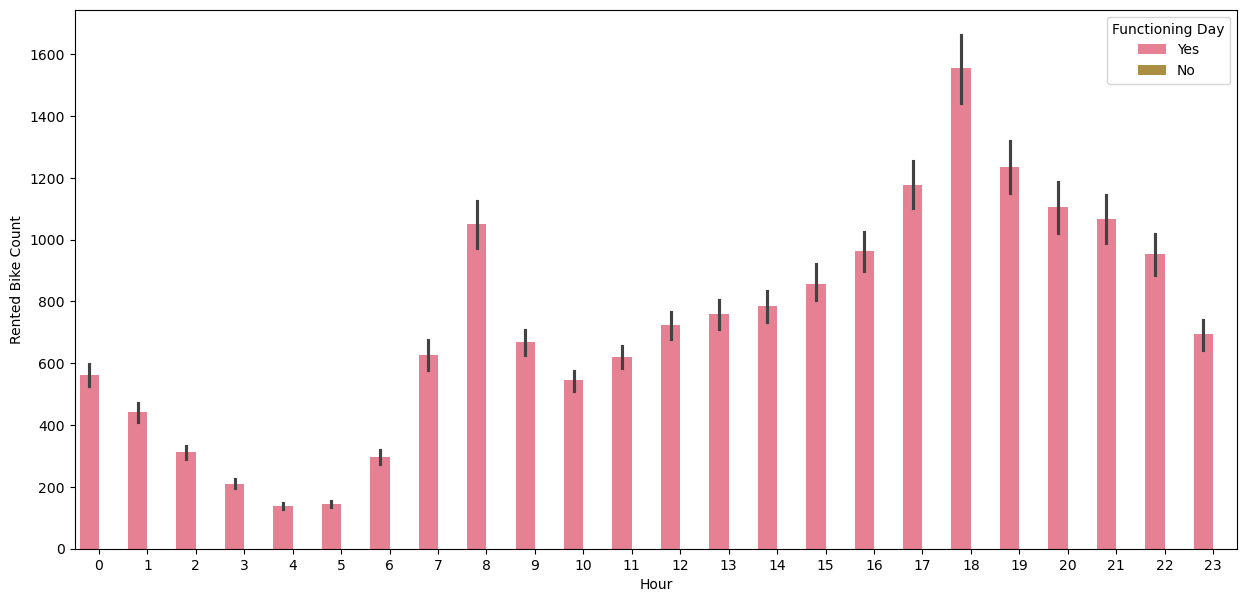

In [5]:
# 2.1_Rented Bike days Filtering

#for chech functioning and non functioning day ,plot (Hour Vs Rented Bike Count Graph)
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [6]:
# Grouping by functioning day and calculating the total Rented Bike Count
data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()


,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


As per diagnosis data found that rental bike only given on Functioning Day,So remove Non Functioning Days and then remove Functioning Day Column Also

In [7]:
#Removing data of non functional days (non rented days)
df=data.drop(data[data['Functioning Day'] == 'No'].index) 

In [8]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
df1=df.drop(['Functioning Day'], axis = 1)
print(df1)

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2      

In [9]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df1.shape,"\n") 


Filtered Dataframe with only rented bike days : (8465, 13) 



In [10]:
# 2.2 _ Seperate Date, Month, Year from Date Column

In [11]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1['DayOfWeek'] = df1['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year





In [12]:
# Drop the 'Date' column and assign the result back to df1
df1 = df1.drop(columns=['Date'])
print(df1)

      Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew

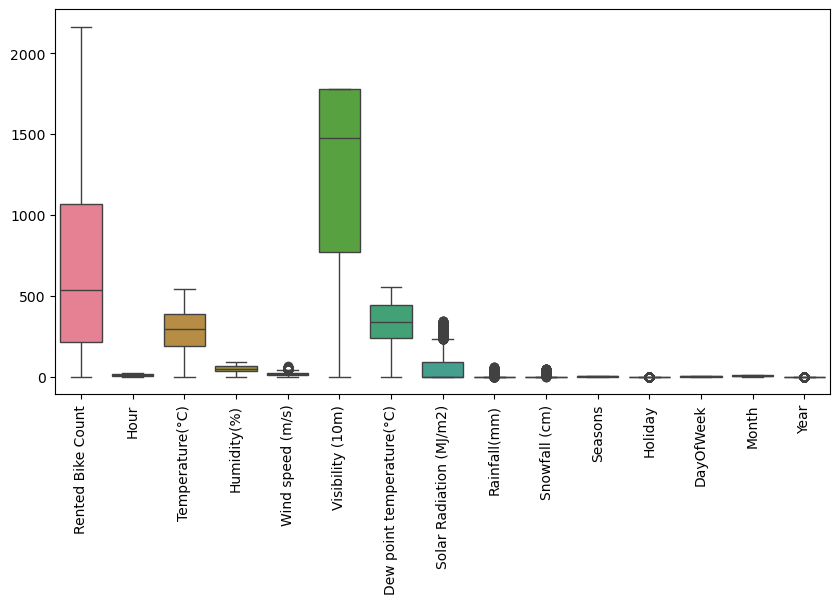

In [13]:
# Exploratory Analysis and Visualization 
le_df= df1.apply(LabelEncoder().fit_transform)
# Encode labels of multiple columns at ones using LabelEncoder
le_df= df1.apply(LabelEncoder().fit_transform)
df1.groupby("Seasons").count()  #for checking raw data
le_df.groupby('Seasons').count() #Seasons convert to numerical after apply transformation on data
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = le_df)    #box plot of le_df data frame raw data
plt.show()

In [14]:
numeric_df

NameError: name 'numeric_df' is not defined

Exploratory Analysis and visualization 
lets explore the data by visualizing the distribution of the values in 
some columns of the dataset, and the relationships between "Rented Bike 
count" and other columns 
We'll use libraries Matplotlib, seaborn for visualization

3.1 _ Checking Correlation Of Data¶
Correlation is a statistical measure that expresses the strength of the relationship between two variables.

The two main types of correlation : positive and negative.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

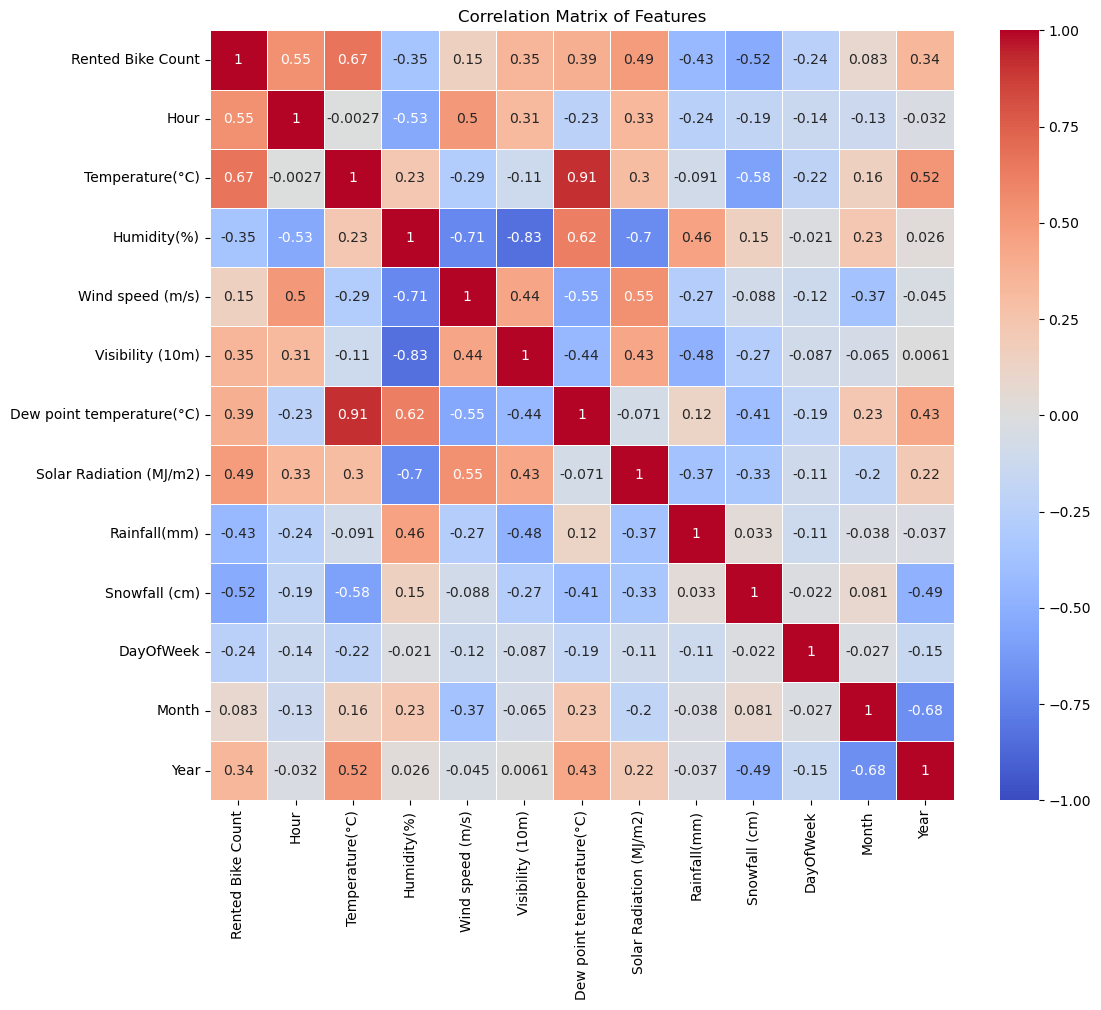

In [14]:

numeric_df = df1.select_dtypes(include=[np.number])
data_corr = numeric_df.corr()



# Calculate the correlation matrix
correlation_matrix = data_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:

print(df1)
#Drop Dew point temperature(°C) from dataset df1
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)

      Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew

In [16]:
selected_features_corr =['Hour', 'Temperature(°C)', 'Month', 'Seasons', 'Functioning Day', 'Solar Radiation (MJ/m2)']
print(selected_features_corr)

['Hour', 'Temperature(°C)', 'Month', 'Seasons', 'Functioning Day', 'Solar Radiation (MJ/m2)']


In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a label encoder object
label_encoder_holiday = LabelEncoder()
label_encoder_seasons = LabelEncoder()

# Apply label encoding to categorical columns in df1 directly
df1['Holiday'] = label_encoder_holiday.fit_transform(df1['Holiday'])
df1['Seasons'] = label_encoder_seasons.fit_transform(df1['Seasons'])


In [29]:
df1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,DayOfWeek,Month,Year,Bike_Rental_Category
0,254,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-0.654079,-0.132495,-0.174951,3,1,4,12,2017,2
1,204,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-0.654079,-0.132495,-0.174951,3,1,4,12,2017,2
2,173,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-0.654079,-0.132495,-0.174951,3,1,4,12,2017,1
3,107,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-0.654079,-0.132495,-0.174951,3,1,4,12,2017,1
4,78,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-0.654079,-0.132495,-0.174951,3,1,4,12,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,1.082723,-0.708138,-1.178853,0.845194,0.755525,-0.654079,-0.132495,-0.174951,0,1,4,11,2018,0
8756,764,1.227221,-0.774233,-1.032395,0.555121,0.929577,-0.654079,-0.132495,-0.174951,0,1,4,11,2018,0
8757,694,1.371719,-0.840329,-0.934756,-1.378704,0.877033,-0.654079,-0.132495,-0.174951,0,1,4,11,2018,0
8758,712,1.516218,-0.881639,-0.837117,-0.701865,0.698056,-0.654079,-0.132495,-0.174951,0,1,4,11,2018,0


Temperature and Dew point temperature are almost 0.91 correlated, So it's generate multicollinearity issue. so we drop Dew point temperature feature

In [30]:
# Correct the numerical features list to match column names in df1
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
                      'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour']

# Apply StandardScaler to the numerical columns in df1
scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])


In [31]:
print(len(df1))
print(len(data))  # Only if you're using a separate 'data' object

print(df1.isnull().sum())  # Check for missing values
print(df1.columns)
print(df1)



8465
8760
Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
DayOfWeek                  0
Month                      0
Year                       0
Bike_Rental_Category       0
dtype: int64
Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'DayOfWeek',
       'Month', 'Year', 'Bike_Rental_Category'],
      dtype='object')
      Rented Bike Count      Hour  Temperature(°C)  Humidity(%)  \
0                   254 -1.662748        -1.484762    -1.032395   
1                   204 -1.518249        -1.509548    -0.983575   
2                   173 -1.373751        -1.550858 

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Define bike rental thresholds and create a categorical variable in df1
bins = [0, 200, 500, float('inf')]
labels = ['low', 'medium', 'high']
df1['Bike_Rental_Category'] = pd.cut(df1['Rented Bike Count'], bins=bins, labels=labels)

# Encode the bike rental categories using LabelEncoder
label_encoder_category = LabelEncoder()
df1['Bike_Rental_Category'] = label_encoder_category.fit_transform(df1['Bike_Rental_Category'])

# Define features (X_class) and target (y_class) for classification
X_class = df1.drop(columns=['Rented Bike Count', 'Bike_Rental_Category'])
y_class = df1['Bike_Rental_Category']

# Feature Selection: Information Gain (Mutual Information)
mutual_info = mutual_info_classif(X_class, y_class)
mutual_info = pd.Series(mutual_info, index=X_class.columns)
mutual_info = mutual_info.sort_values(ascending=False)

# Print top features based on Information Gain
print("Top Features based on Information Gain (Mutual Information):")
print(mutual_info)

# Select top 7 features based on Information Gain
selected_features_ig = mutual_info.head(7).index
print(selected_features_ig)


Top Features based on Information Gain (Mutual Information):
Temperature(°C)            0.243862
Month                      0.196782
Seasons                    0.192141
Hour                       0.141217
Solar Radiation (MJ/m2)    0.117111
Humidity(%)                0.066154
Year                       0.052912
Rainfall(mm)               0.045513
Snowfall (cm)              0.039755
Visibility (10m)           0.033773
Wind speed (m/s)           0.018493
DayOfWeek                  0.006048
Holiday                    0.002651
dtype: float64
Index(['Temperature(°C)', 'Month', 'Seasons', 'Hour',
       'Solar Radiation (MJ/m2)', 'Humidity(%)', 'Year'],
      dtype='object')


The feature DayOfWeek has the lowest mutual information (0.000000) and does not provide any valuable information for predicting the target variable. Therefore, it should be considered for removal. Additionally, Holiday has a very low information gain (0.008278), so it could also be considered for removal if you need to further reduce features.

In [33]:
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest
import pandas as pd

# Chi-Square test expects non-negative values, so we'll take the absolute value of X_class if necessary
# Ensure that all numerical features are non-negative for the chi-square test
X_class_non_negative = X_class.copy()

# Ensure numerical columns are non-negative (Chi-Square test requirement)
X_class_non_negative = X_class_non_negative.abs()

# Feature Selection: Chi-Square Test
chi_scores, p_values = chi2(X_class_non_negative, y_class)
chi_scores = pd.Series(chi_scores, index=X_class.columns)
chi_scores = chi_scores.sort_values(ascending=False)

# Print top features based on Chi-Square Test
print("\nTop Features based on Chi-Square Test:")
print(chi_scores)

# Select top 7 features based on Chi-Square test scores
selected_features_chi = chi_scores.head(7).index
print("Top 7 features based on Chi-Square test:")
print(selected_features_chi)



Top Features based on Chi-Square Test:
Rainfall(mm)               1172.346132
Seasons                    1073.453790
Snowfall (cm)               876.129254
Month                       743.912112
Solar Radiation (MJ/m2)     319.788417
Humidity(%)                 175.127621
Temperature(°C)             104.324506
Visibility (10m)             93.391913
Hour                         55.163756
Wind speed (m/s)             35.609255
DayOfWeek                     6.794858
Holiday                       4.075976
Year                          0.026635
dtype: float64
Top 7 features based on Chi-Square test:
Index(['Rainfall(mm)', 'Seasons', 'Snowfall (cm)', 'Month',
       'Solar Radiation (MJ/m2)', 'Humidity(%)', 'Temperature(°C)'],
      dtype='object')


Based on the Chi-Square test results, Year has the lowest score (0.027726), indicating that it has the least association with the target variable compared to other features. Therefore, Year should be considered for removal.

Holiday and DayOfWeek also have relatively low scores, suggesting they might not be very impactful features, but Year is the most obvious candidate for removal in this case.

from above we can see that Dew point temperature,Day of week,year

In [34]:


def develop_and_evaluate_model(X, y, selected_features, model_type='random_forest', feature_selection='chi'):
    """
    Trains a model on selected features using either Random Forest, Logistic Regression, or SVM 
    and evaluates its performance.

    Parameters:
    - X: DataFrame containing all features.
    - y: Series containing target labels.
    - selected_features: List of features to use for model training.
    - model_type: String specifying the model to use ('random_forest', 'logistic', 'svm').
    - feature_selection: String specifying the feature selection method used ('chi', 'information_gain').

    Returns:
    - None: Prints evaluation metrics and plots the ROC curve.
    """

    # Select model based on user input
    if model_type == 'random_forest':
        model = RandomForestClassifier(random_state=42)
    elif model_type == 'logistic':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_type == 'svm':
        model = SVC(probability=True, random_state=42)
    else:
        raise ValueError("Invalid model_type. Choose 'random_forest', 'logistic', or 'svm'.")

    # Select the specified features
    X_selected = X[selected_features]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # For ROC AUC Score, predict probabilities if the model supports it
    if model_type == 'svm' or model_type == 'random_forest' or model_type == 'logistic':
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    else:
        roc_auc = None  # ROC AUC is not applicable for some models without probability estimates

    # Print the evaluation metrics
    print(f"\nModel Evaluation Results using {feature_selection} features and {model_type} model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve if applicable
    if roc_auc is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve ({model_type} model)')
        plt.legend(loc="lower right")
        plt.show()



Model Evaluation Results using chi features and random_forest model:
Accuracy: 0.7643
F1 Score: 0.7615
Recall: 0.7643
ROC AUC Score: 0.9025


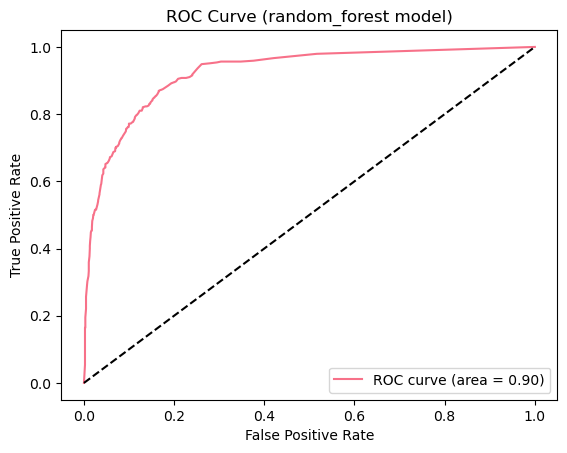


Model Evaluation Results using chi features and logistic model:
Accuracy: 0.7372
F1 Score: 0.7220
Recall: 0.7372
ROC AUC Score: 0.8747


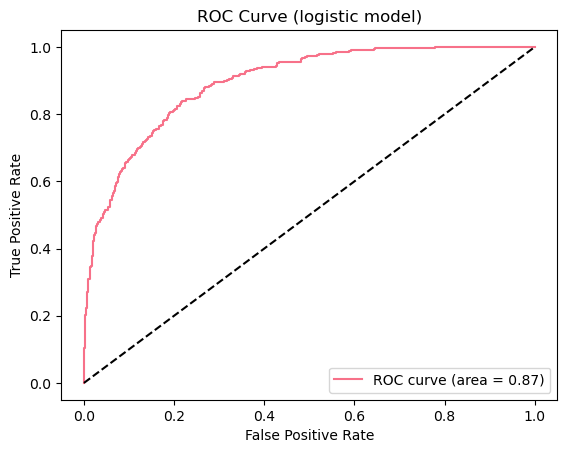


Model Evaluation Results using chi features and svm model:
Accuracy: 0.7454
F1 Score: 0.7205
Recall: 0.7454
ROC AUC Score: 0.8839


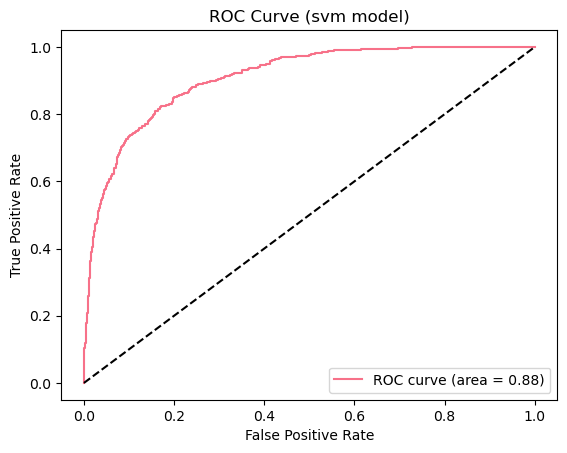


Model Evaluation Results using information_gain features and random_forest model:
Accuracy: 0.8482
F1 Score: 0.8484
Recall: 0.8482
ROC AUC Score: 0.9521


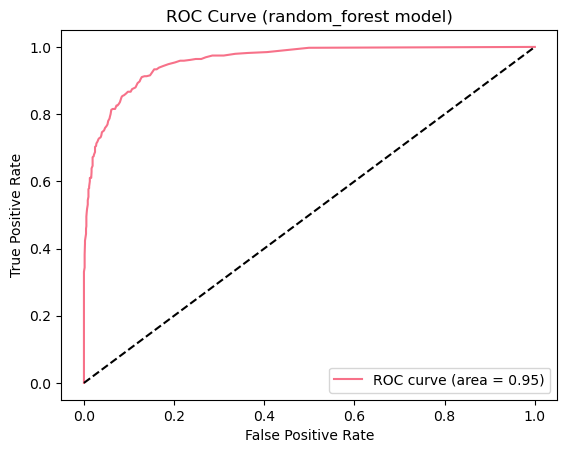

C:\Users\dipak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Evaluation Results using information_gain features and logistic model:
Accuracy: 0.7253
F1 Score: 0.7185
Recall: 0.7253
ROC AUC Score: 0.8841


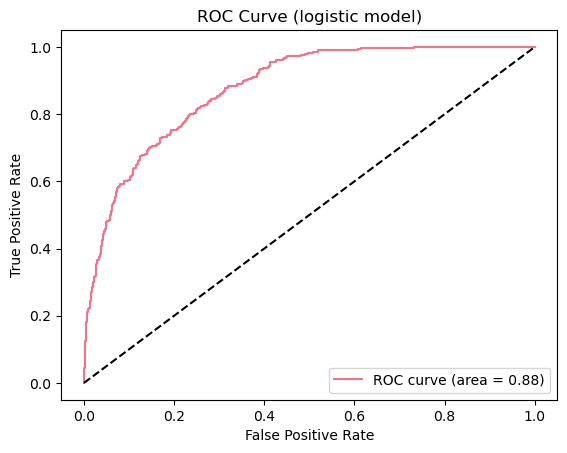


Model Evaluation Results using information_gain features and svm model:
Accuracy: 0.5192
F1 Score: 0.3549
Recall: 0.5192
ROC AUC Score: 0.8403


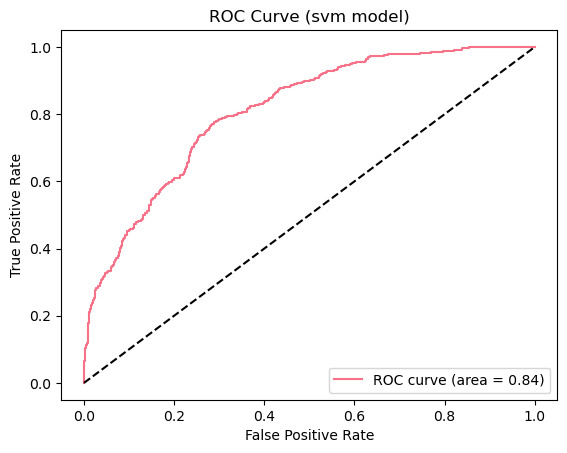

In [35]:
# Using Chi-Square selected features and Random Forest
develop_and_evaluate_model(X_class, y_class, selected_features_chi, model_type='random_forest', feature_selection='chi')

# Using Chi-Square selected features and Random Forest
develop_and_evaluate_model(X_class, y_class, selected_features_chi, model_type='logistic', feature_selection='chi')


# Using Chi-Square selected features and Random Forest
develop_and_evaluate_model(X_class, y_class, selected_features_chi, model_type='svm', feature_selection='chi')


# Using Information Gain selected features and Logistic Regression
develop_and_evaluate_model(X_class, y_class, selected_features_ig, model_type='random_forest', feature_selection='information_gain')

# Using Information Gain selected features and Logistic Regression
develop_and_evaluate_model(X_class, y_class, selected_features_ig, model_type='logistic', feature_selection='information_gain')

# Using Information Gain selected features and Logistic Regression
develop_and_evaluate_model(X_class, y_class, selected_features_ig, model_type='svm', feature_selection='information_gain')


In [57]:
# Correct the numerical features list to match column names in df1
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Month',
                      'Solar Radiation (MJ/m2)', 'Hour']
selected_features_ig =  ['Temperature(°C)', 'Humidity(%)', 'Month',
                      'Solar Radiation (MJ/m2)', 'Hour']
# Apply StandardScaler to the numerical columns in df1
# scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])


best_model = RandomForestClassifier(random_state=42)
# Select the specified features
X_selected = X_class[selected_features_ig]

 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_class, test_size=0.2, random_state=42)
# Train the model
best_model.fit(X_train, y_train)
    # Make predictions
y_pred = best_model.predict(X_test)
# Define new data with the required features
new_data = pd.DataFrame({
    'Temperature(°C)': [-7.6, 21, 25.1, 22, 25],
    'Humidity(%)': [37, 96, 83, 65, 70],
    'Month': [1, 6, 7, 10, 11],
    'Solar Radiation (MJ/m2)': [0.01, 0.6, 0, 0.8, 0.9],
    'Hour': [12,20, 4, 16, 18]
})

# Transform the new data categorical variables
# new_data['Seasons'] = label_encoder_seasons.transform(new_data['Seasons'])
new_data[selected_features_ig] = scaler.transform(new_data[selected_features_ig])


# Predict the bike rental category (low, medium, high) for new data
bike_rental_category_predictions = best_model.predict(new_data)
bike_rental_category_labels = label_encoder_category.inverse_transform(bike_rental_category_predictions)

print("\nPredicted Bike Rental Categories for New Data:")
for i, label in enumerate(bike_rental_category_labels):
    print(f"Data point {i + 1}: {label}")



Predicted Bike Rental Categories for New Data:
Data point 1: low
Data point 2: high
Data point 3: medium
Data point 4: low
Data point 5: low


In [59]:

import pickle

# Save the model using pickle for future predictions
with open('best_bike_rental_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler for future use
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)